In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(url, header=None, sep=",")

wine.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Description des data

- 3 classes à équilibrées
- 13 variables quantitatives avec des échelles différentes
  - Quelques valeurs aberrantes
  - Pas de distribution trop asymétrique

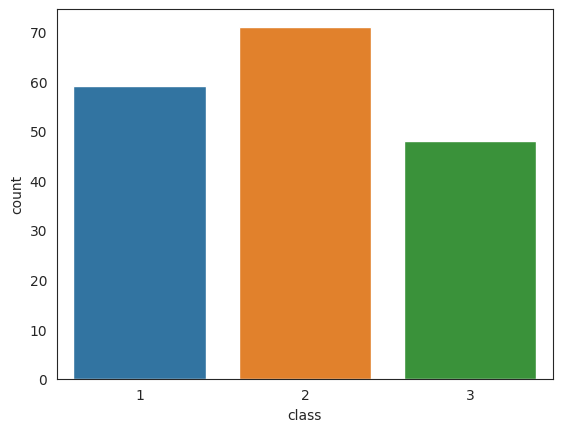

In [10]:
sns.countplot(data=wine, x="class", )
plt.show()

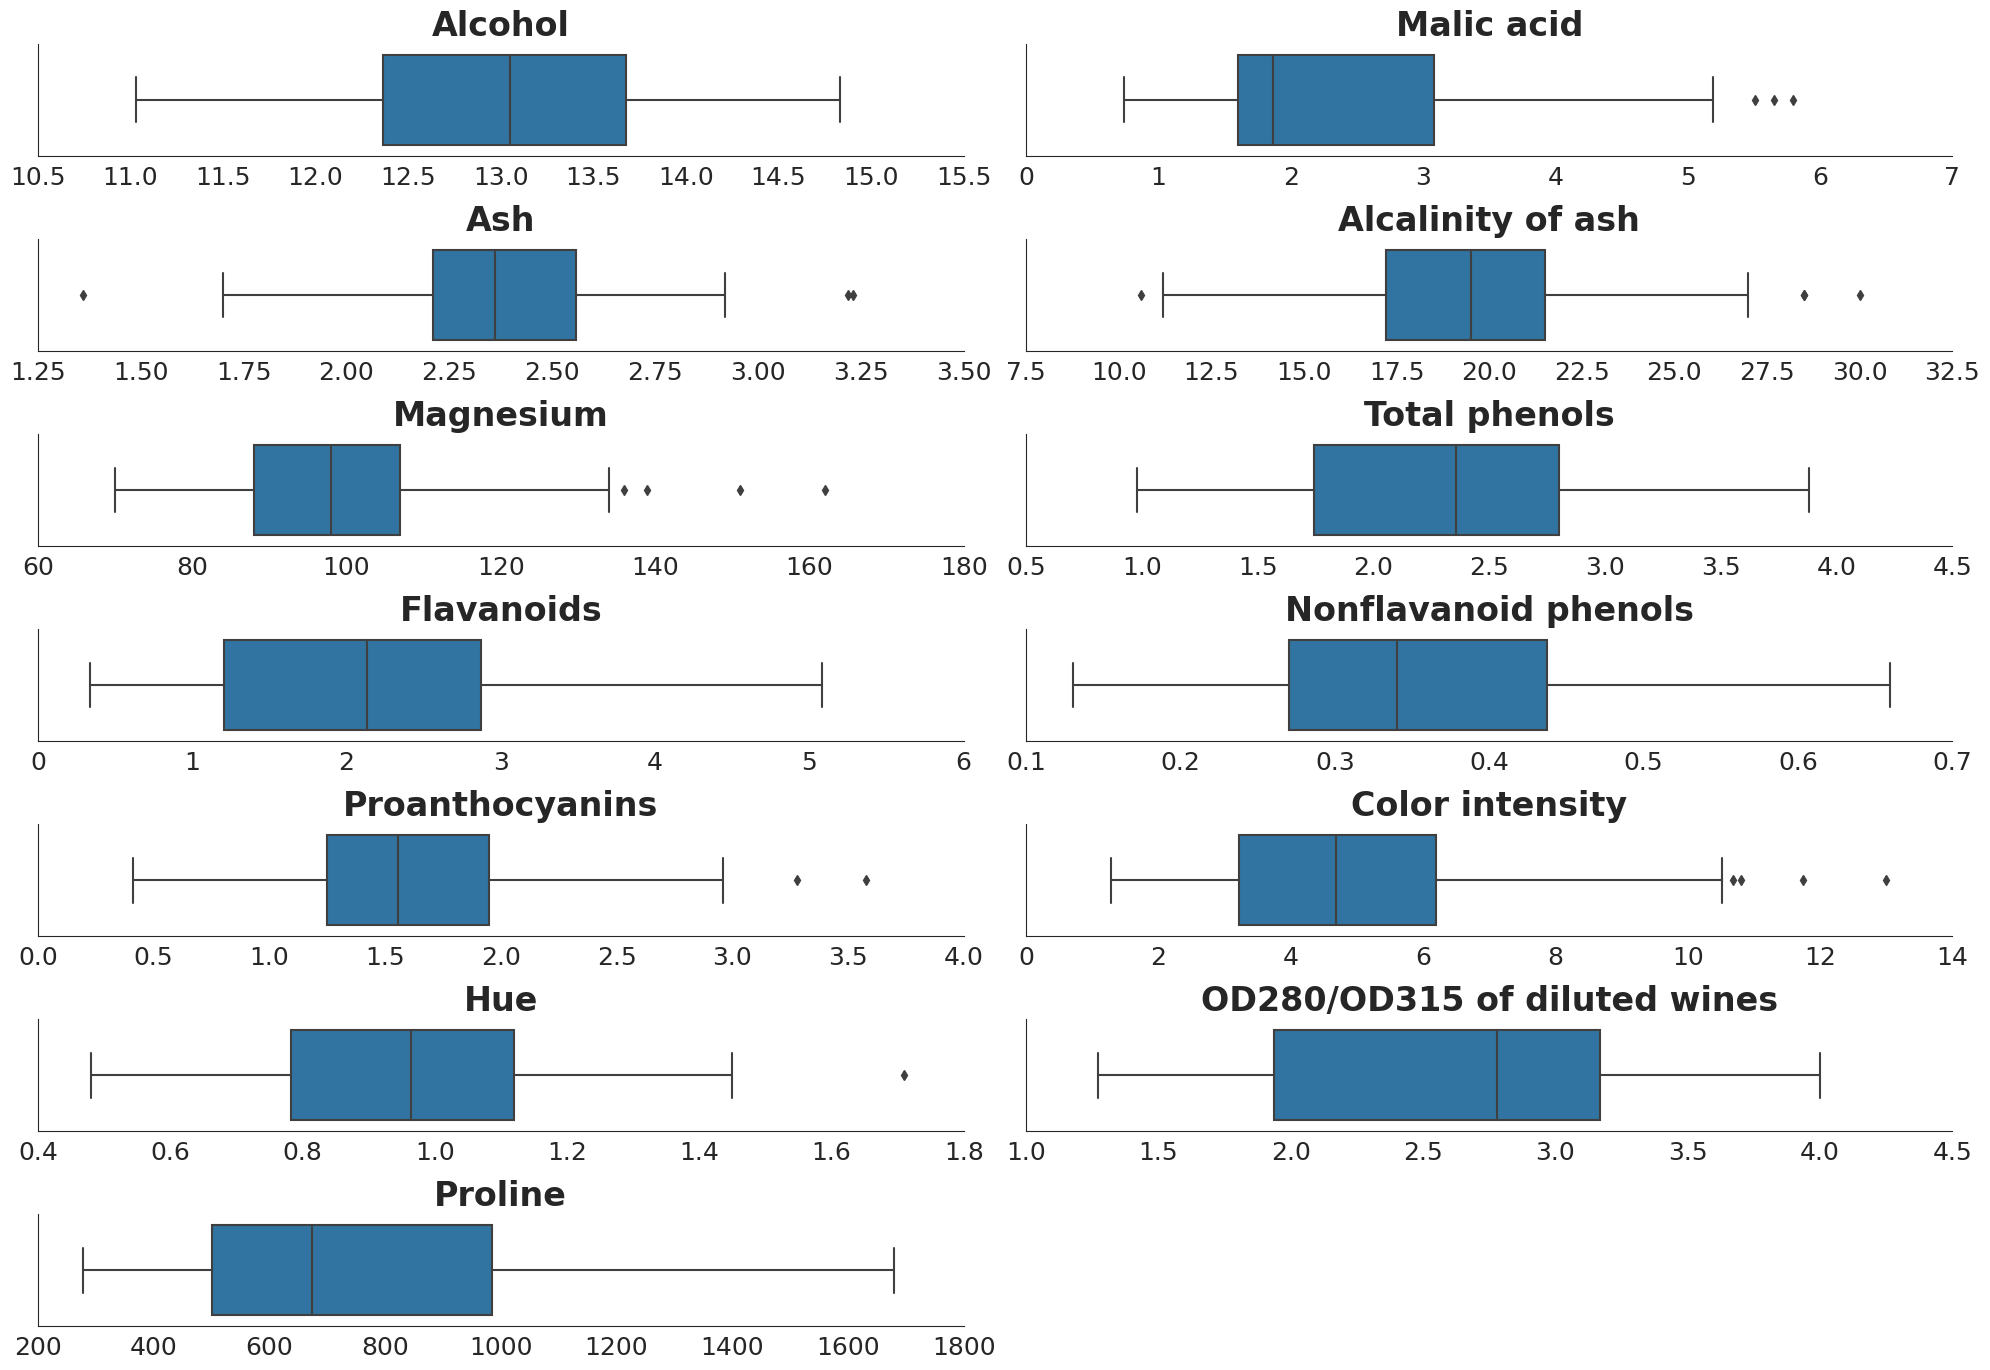

In [11]:
g = sns.catplot(data=wine.melt(id_vars="class"), x="value", kind = "box", 
                height=2, aspect=5, col="variable", col_wrap=2, sharex=False)
g.set_titles(col_template="{col_name}", fontweight="bold", size=24)
g.set_xticklabels(size=18)
g.tight_layout()
g.set_axis_labels(x_var="")
plt.show()

In [12]:
wine.drop(columns="class").corr().round(1)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.0,0.1,0.2,-0.3,0.3,0.3,0.2,-0.2,0.1,0.5,-0.1,0.1,0.6
Malic acid,0.1,1.0,0.2,0.3,-0.1,-0.3,-0.4,0.3,-0.2,0.2,-0.6,-0.4,-0.2
Ash,0.2,0.2,1.0,0.4,0.3,0.1,0.1,0.2,0.0,0.3,-0.1,0.0,0.2
Alcalinity of ash,-0.3,0.3,0.4,1.0,-0.1,-0.3,-0.4,0.4,-0.2,0.0,-0.3,-0.3,-0.4
Magnesium,0.3,-0.1,0.3,-0.1,1.0,0.2,0.2,-0.3,0.2,0.2,0.1,0.1,0.4
Total phenols,0.3,-0.3,0.1,-0.3,0.2,1.0,0.9,-0.4,0.6,-0.1,0.4,0.7,0.5
Flavanoids,0.2,-0.4,0.1,-0.4,0.2,0.9,1.0,-0.5,0.7,-0.2,0.5,0.8,0.5
Nonflavanoid phenols,-0.2,0.3,0.2,0.4,-0.3,-0.4,-0.5,1.0,-0.4,0.1,-0.3,-0.5,-0.3
Proanthocyanins,0.1,-0.2,0.0,-0.2,0.2,0.6,0.7,-0.4,1.0,-0.0,0.3,0.5,0.3
Color intensity,0.5,0.2,0.3,0.0,0.2,-0.1,-0.2,0.1,-0.0,1.0,-0.5,-0.4,0.3


## ACP

Ici, les variables ont des échelles très différentes → `ACP normée`

In [13]:
wine_bis = scale(wine.drop(columns="class"))
pca = PCA(n_components=13)
pca.fit(wine_bis)

PCA(n_components=13)

### Choix du nombre d'axes

In [14]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(13)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig.head(4)

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4.732437,36.0,36.0
1,Dim2,2.511081,19.0,55.0
2,Dim3,1.454242,11.0,67.0
3,Dim4,0.924166,7.0,74.0


* 2 axes permettent d'expliquer 55 % de l'information
* Seuls 3 axes ont une valeur propre plus grande que 1.

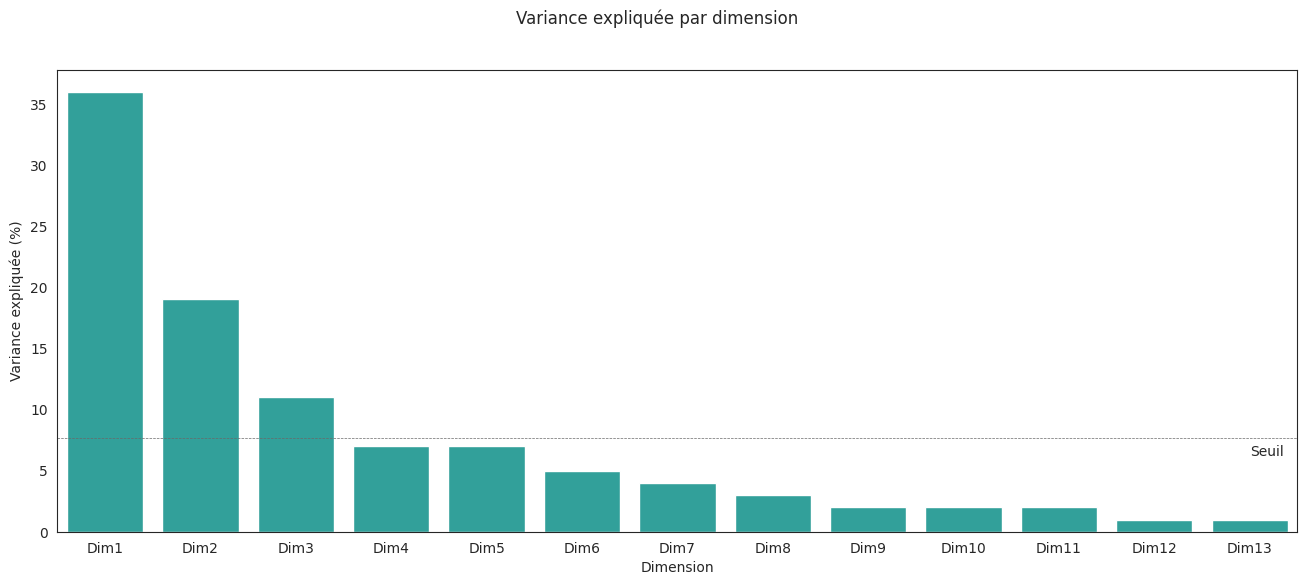

In [15]:
plt.figure(figsize=(16,6))
g_eig = sns.barplot(data=eig, x="Dimension", y="% variance expliquée", palette=["lightseagreen"])
plt.text(12, 100/16, "Seuil")
plt.axhline(y=100/13, linewidth=.5, color="dimgray", linestyle="--")
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

### Graphiques

#### Nuage de points sur le premier plan factoriel

In [16]:
wine_pca_df = pd.DataFrame(pca.transform(wine_bis), 
                           columns=["Dim" + str(i+1) for i in range(13)]) \
                        .assign(Class=wine["class"])

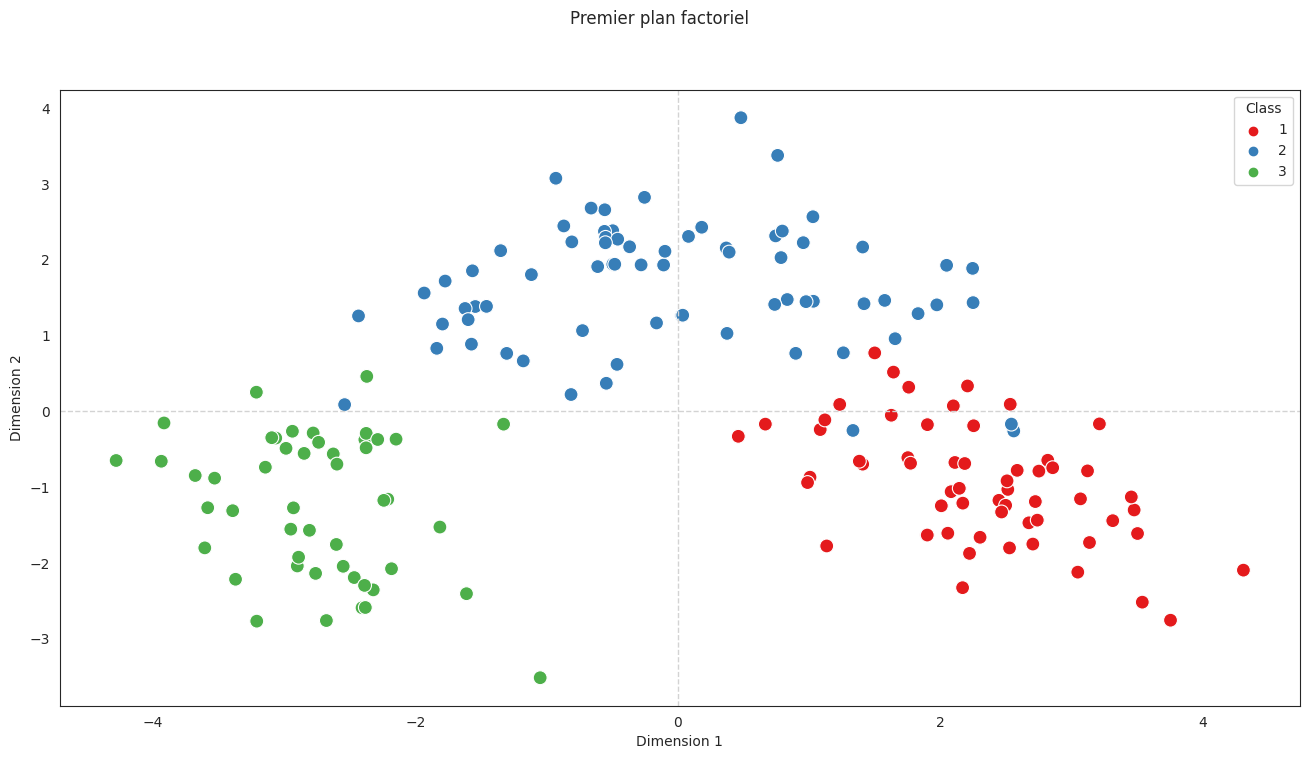

In [17]:
fig, axes = plt.subplots(figsize=(16,8))
fig.suptitle("Premier plan factoriel")
axes.axvline(x=0, color='lightgray', linestyle='--', linewidth=1)
axes.axhline(y=0, color='lightgray', linestyle='--', linewidth=1)

g_pca = sns.scatterplot(data=wine_pca_df, x="Dim1", y="Dim2", hue="Class",  palette="Set1", s=100)
g_pca.set(xlabel="Dimension 1", ylabel="Dimension 2")

plt.show()

* Les points semblent faire un arc de cercle
* Classes de vin assez séparées

#### Cercle des corrélations

In [18]:
coordvar = pca.components_.T * np.sqrt(pca.explained_variance_)
coordvar_df = pd.DataFrame(coordvar, columns=['PC'+str(i+1) for i in range(13)], index=wine.columns[1:])

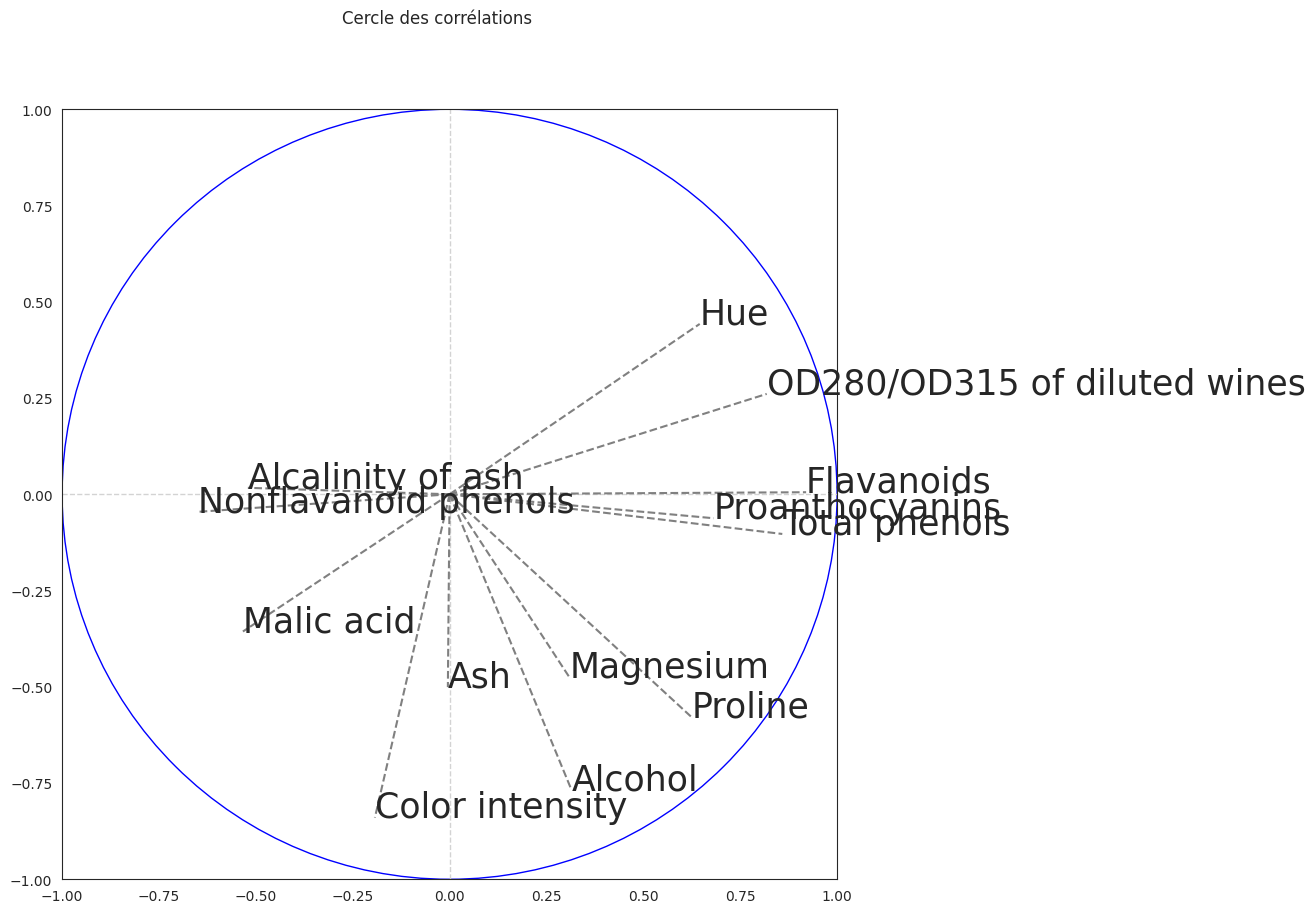

In [19]:
fig, axes = plt.subplots(figsize=(10,10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x=0, color='lightgray', linestyle='--', linewidth=1)
axes.axhline(y=0, color='lightgray', linestyle='--', linewidth=1)
for j in range(13):
    axes.text(coordvar_df["PC1"][j],coordvar_df["PC2"][j], coordvar_df.index[j], size=25)
    axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC2"][j]], color="gray", linestyle='dashed')
plt.gca().add_artist(plt.Circle((0,0),1, color='blue', fill=False))

plt.show()